In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
import numpy as np
import seaborn.objects as so

C:\Users\micha\AppData\Local\Temp\ipykernel_20712\1961342948.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Spatial relationships
An important aspect of geospatial data is that we can look at spatial relationships: how two spatial objects relate to each other (whether they overlap, intersect, contain, .. one another).

The topological, set-theoretic relationships in GIS are typically based on the DE-9IM model. See https://en.wikipedia.org/wiki/Spatial_relation for more informati
on.
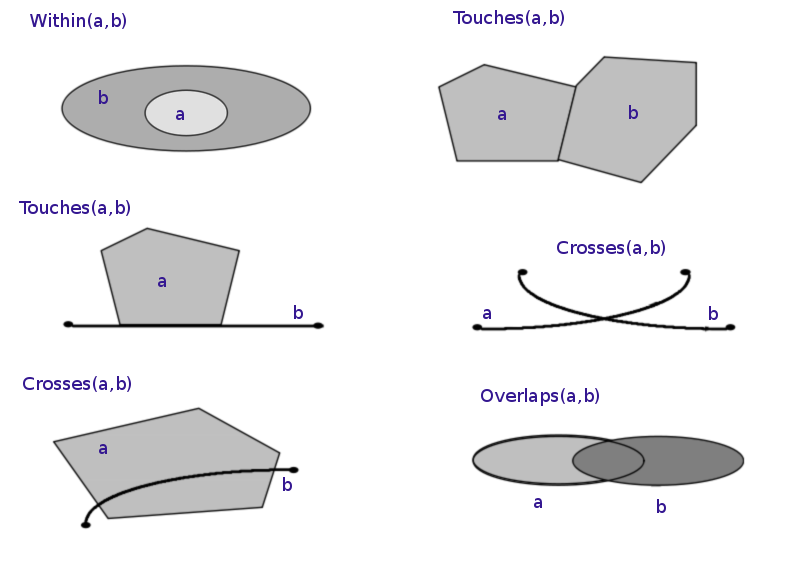!

In [2]:
geodata = gpd.read_file("data/tmp/mli_accled_clean.json")

Lets takem a look on insurgenci - ied

In [3]:
geodata.columns

Index(['event_id_cnty', 'event_date', 'disorder_type', 'event_type',
       'sub_event_type', 'actor1', 'assoc_actor_1', 'actor2', 'assoc_actor_2',
       'civilian_targeting', 'latitude', 'longitude', 'source', 'notes',
       'fatalities', 'geometry'],
      dtype='object')

In [4]:
geodata.sub_event_type.value_counts()

sub_event_type
Attack                                 1042
Armed clash                             932
Looting/property destruction            532
Abduction/forced disappearance          347
Remote explosive/landmine/IED           290
Air/drone strike                        216
Other                                   203
Peaceful protest                        157
Disrupted weapons use                   121
Shelling/artillery/missile attack        73
Arrests                                  63
Change to group/activity                 57
Mob violence                             53
Violent demonstration                    27
Agreement                                21
Non-violent transfer of territory        12
Sexual violence                           8
Non-state actor overtakes territory       7
Government regains territory              5
Headquarters or base established          5
Grenade                                   3
Suicide bomb                              2
Protest with inte

In [5]:
question = 'Armed clash'

In [6]:
flt = (geodata.sub_event_type == question)

In [7]:
geodata.loc[flt]

,event_id_cnty,event_date,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,civilian_targeting,latitude,longitude,source,notes,fatalities,geometry
20,MLI6161,25-Jan-22,Political violence,Battles,Armed clash,Military Forces of Mali (2021-),Military Forces of Estonia (2021-); Military F...,Islamic State (West Africa) - Greater Sahara F...,None,None,15.3217,0.7464,Armee Francaise,"On 25 January 2022, Malian forces supported by...",0.0,POINT (0.74640 15.32170)
24,MLI30466,06-Jul-23,Political violence,Battles,Armed clash,Islamic State (Sahel),None,MINUSMA: United Nations Multidimensional Integ...,None,None,15.3217,0.7464,RFI; UN MINUSMA; Undisclosed Source; Whatsapp,"On 6 July 2023, presumed IS Sahel militants fi...",0.0,POINT (0.74640 15.32170)
26,MLI7405,01-Oct-22,Political violence,Battles,Armed clash,Islamic State (Sahel),None,Military Forces of Mali (2021-),None,None,15.3217,0.7464,FAMAMali; Whatsapp,"On 1 October 2022, presumed IS Sahel militants...",0.0,POINT (0.74640 15.32170)
33,MLI6829,13-Jun-22,Political violence,Battles,Armed clash,Islamic State (Sahel),None,Military Forces of Mali (2021-),None,None,15.3533,0.7607,Undisclosed Source; Twitter; Whatsapp,"On 13 June 2022, presumed IS Sahel militants f...",2.0,POINT (0.76070 15.35330)
49,MLI31600,25-Dec-23,Political violence,Battles,Armed clash,Military Forces of Mali (2021-),Wagner Group,Islamic State (Sahel),None,None,15.3533,0.7607,Undisclosed Source,"On 25 December 2023, FAMa forces and Wagner me...",0.0,POINT (0.76070 15.35330)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,MLI6224,13-Feb-22,Political violence,Battles,Armed clash,Katiba Macina,JNIM: Group for Support of Islam and Muslims,Military Forces of Mali (2021-),None,None,15.9322,-3.9906,AFP; AMAP; FAMAMali,"On 13 February 2022, Katiba Macina (JNIM) mili...",7.0,POINT (-3.99060 15.93220)
4132,MLI30474,02-Jul-23,Political violence,Battles,Armed clash,Military Forces of Mali (2021-),Wagner Group,JNIM: Group for Support of Islam and Muslims,None,None,14.7558,-4.1932,Al Zallaqa; Undisclosed Source; Whatsapp,"Around 2 July 2023 (between 2 - 3 July), FAMa ...",7.0,POINT (-4.19320 14.75580)
4151,MLI7145,09-Sep-22,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,None,Military Forces of Mali (2021-),None,None,15.9322,-3.9906,FAMAMali; Twitter; Undisclosed Source,"On 9 September 2022, presumed JNIM militants c...",0.0,POINT (-3.99060 15.93220)
4157,MLI30761,29-Aug-23,Political violence,Battles,Armed clash,Military Forces of Mali (2021-),None,JNIM: Group for Support of Islam and Muslims,None,None,15.9322,-3.9906,FAMAMali,"On 29 August 2023, FAMa claimed to have 'neutr...",1.0,POINT (-3.99060 15.93220)


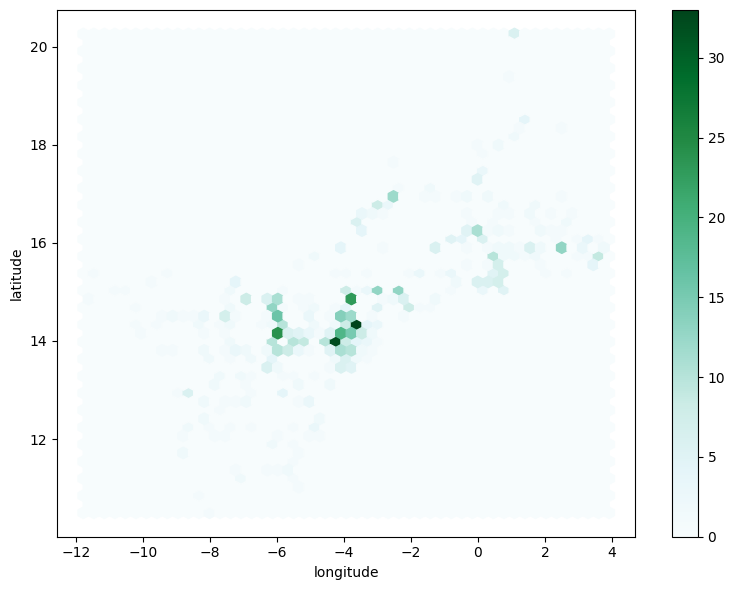

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

geodata.loc[flt].plot.hexbin( x='longitude', y='latitude', gridsize=50, ax=ax)
plt.tight_layout()

In [9]:
mli_adm1 = gpd.read_file("data/gadm41_MLI_1.json")

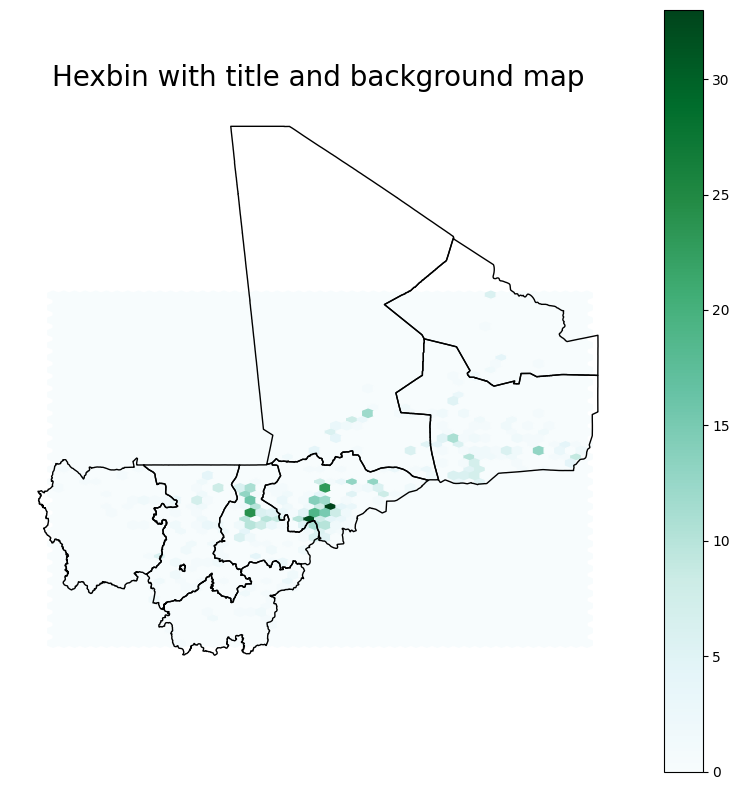

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
geodata.loc[flt].plot.hexbin( x='longitude', y='latitude', gridsize=50, ax=ax)
mli_adm1.plot(ax=ax, color='None',edgecolor='black')
ax.set_title('Hexbin with title and background map', fontsize=20, pad=10)
plt.axis('off')
fig.tight_layout()

Let's find out the area with most events to find where to go with our company on business trip

In [13]:
mli_adm4 = gpd.read_file("data/gadm41_MLI_4.json.zip")

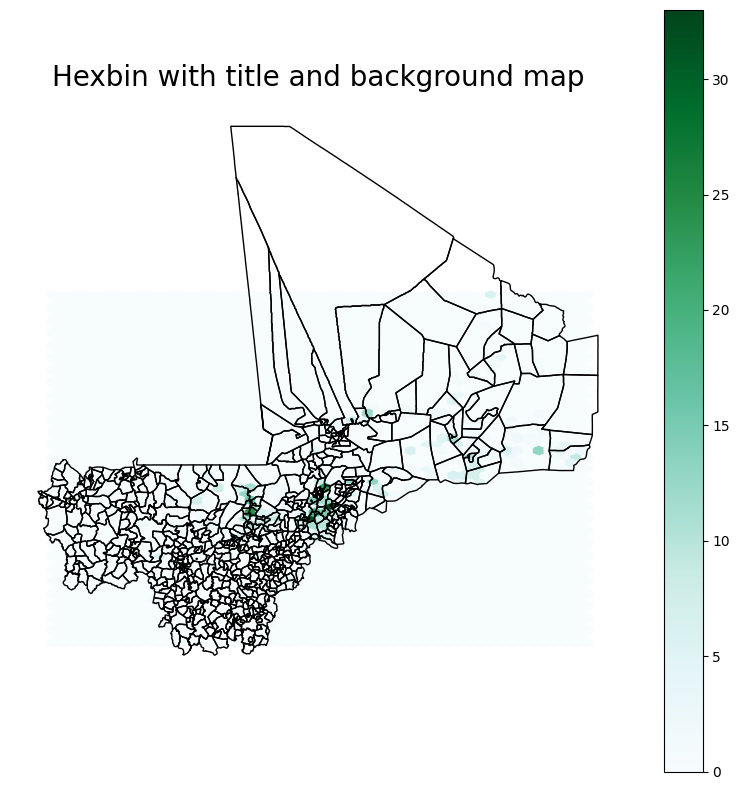

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
geodata.loc[flt].plot.hexbin( x='longitude', y='latitude', gridsize=50, ax=ax)
mli_adm4.plot(ax=ax, color='None',edgecolor='black')
ax.set_title('Hexbin with title and background map', fontsize=20, pad=10)
plt.axis('off')
fig.tight_layout()

Spatial join

In [15]:
joined = gpd.sjoin(geodata, adm4, predicate='within', how='left')

In [16]:
joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4180 entries, 0 to 4179
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   event_id_cnty       4180 non-null   object  
 1   event_date          4180 non-null   object  
 2   disorder_type       4180 non-null   object  
 3   event_type          4180 non-null   object  
 4   sub_event_type      4177 non-null   object  
 5   actor1              4180 non-null   object  
 6   assoc_actor_1       634 non-null    object  
 7   actor2              3795 non-null   object  
 8   assoc_actor_2       1424 non-null   object  
 9   civilian_targeting  1553 non-null   object  
 10  latitude            4180 non-null   float64 
 11  longitude           4180 non-null   float64 
 12  source              4180 non-null   object  
 13  notes               4179 non-null   object  
 14  fatalities          4180 non-null   float64 
 15  geometry            4180 non-null  

In [17]:
joined[['sub_event_type_count','actor1_count','actor2_count']]= 1

In [18]:
grouped = joined.groupby(by=['sub_event_type','NAME_4']).agg({"fatalities":'sum', 'sub_event_type_count': 'count','actor1_count':'count','actor2_count':'count'})

In [19]:
grouped

fatalities  \
sub_event_type                 NAME_4                       
Abduction/forced disappearance Alafia                 0.0   
                               Alata                  0.0   
                               Anchawadi              0.0   
                               Anderamboukane         0.0   
                               Anefif                 0.0   
...                                                   ...   
Violent demonstration          Mande                  0.0   
                               Menaka                 2.0   
                               Mopti                  0.0   
                               Sikasso                9.0   
                               Tombouctou             0.0   

                                               sub_event_type_count  \
sub_event_type                 NAME_4                                 
Abduction/forced disappearance Alafia                             2   
                               Alata                              1   
                               Anchawadi                          2   
                               Anderamboukane                     6   
                               Anefif                             1   
...                                                             ...   
Violent demonstration          Mande                              1   
                               Menaka                             4   
                               Mopti                              1   
                               Sikasso                            1   
                               Tombouctou                         2   

                                               actor1_count  actor2_count  
sub_event_type                 NAME_4                                      
Abduction/forced disappearance Alafia                     2             2  
                               Alata                      1             1  
                               Anchawadi                  2             2  
                               Anderamboukane             6             6  
                               Anefif                     1             1  
...                                                     ...           ...  
Violent demonstration          Mande                      1             1  
                               Menaka                     4             4  
                               Mopti                      1             1  
                               Sikasso                    1             1  
                               Tombouctou                 2             2  

[1299 rows x 4 columns]

In [20]:
grouped.loc[question].sort_values(by='sub_event_type_count', ascending=False).head(20)

,fatalities,sub_event_type_count,actor1_count,actor2_count
NAME_4,,,,
Menaka,330.0,36,36,36
Doucoumbo,94.0,35,35,35
Niono,54.0,23,23,23
Haire,184.0,21,21,21
Fakala-Dje,79.0,21,21,21
Ouattagouna,55.0,20,20,20
Gossi,84.0,18,18,18
BaraSara,129.0,18,18,18
PignariBana,53.0,17,17,17


All that have count bigger then 8

In [21]:
flt = grouped.loc[question]['sub_event_type_count'] > 10

In [22]:
places = [n for n in grouped.loc[question][flt].index]

In [23]:
places

['Anderamboukane',
 'BaraSara',
 'Bourem-Inaly',
 'Bourra',
 'Diabaly',
 'Dogofry-Nio',
 'Doucoumbo',
 'Fakala-Dje',
 'Femaye',
 'Gossi',
 'Haire',
 'Kolongo',
 'Konna',
 'LowolGueou',
 'Mariko',
 'Menaka',
 'Mondoro',
 'Monimpebougou',
 "N'Tillit",
 'Niamana-Nar',
 'Niono',
 'Ouattagouna',
 'PignariBana',
 'Sio',
 'Sokolo',
 'Tessit',
 'Timiri',
 'Timissa']

In [24]:
meid = joined[joined['NAME_4'].apply(lambda x: x in places)]

In [25]:
meid = meid[meid.sub_event_type == question]

In [26]:
meid

,event_id_cnty,event_date,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,civilian_targeting,...,GID_3,NAME_3,NAME_4,VARNAME_4,TYPE_4,ENGTYPE_4,CC_4,sub_event_type_count,actor1_count,actor2_count
20,MLI6161,25-Jan-22,Political violence,Battles,Armed clash,Military Forces of Mali (2021-),Military Forces of Estonia (2021-); Military F...,Islamic State (West Africa) - Greater Sahara F...,None,None,...,MLI.2.1.2_1,Ouatagouna,Ouattagouna,NA,Commune,Commune,NA,1,1,1
24,MLI30466,06-Jul-23,Political violence,Battles,Armed clash,Islamic State (Sahel),None,MINUSMA: United Nations Multidimensional Integ...,None,None,...,MLI.2.1.2_1,Ouatagouna,Ouattagouna,NA,Commune,Commune,NA,1,1,1
26,MLI7405,01-Oct-22,Political violence,Battles,Armed clash,Islamic State (Sahel),None,Military Forces of Mali (2021-),None,None,...,MLI.2.1.2_1,Ouatagouna,Ouattagouna,NA,Commune,Commune,NA,1,1,1
33,MLI6829,13-Jun-22,Political violence,Battles,Armed clash,Islamic State (Sahel),None,Military Forces of Mali (2021-),None,None,...,MLI.2.1.2_1,Ouatagouna,Ouattagouna,NA,Commune,Commune,NA,1,1,1
49,MLI31600,25-Dec-23,Political violence,Battles,Armed clash,Military Forces of Mali (2021-),Wagner Group,Islamic State (Sahel),None,None,...,MLI.2.1.2_1,Ouatagouna,Ouattagouna,NA,Commune,Commune,NA,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,MLI6463,27-Mar-22,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,None,Military Forces of France (2017-),None,None,...,MLI.9.3.2_1,Gossi,Gossi,NA,Commune,Commune,NA,1,1,1
3959,MLI6040,04-Jan-22,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,None,Islamic State (West Africa) - Greater Sahara F...,None,None,...,MLI.2.3.5_1,In-Tillit,N'Tillit,NA,Commune,Commune,NA,1,1,1
3973,MLI30868,14-Sep-23,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,None,Military Forces of Mali (2021-),Wagner Group,None,...,MLI.9.3.2_1,Gossi,Gossi,NA,Commune,Commune,NA,1,1,1
3979,MLI30080,14-May-23,Political violence,Battles,Armed clash,Islamic State (Sahel),None,JNIM: Group for Support of Islam and Muslims,None,None,...,MLI.2.3.5_1,In-Tillit,N'Tillit,NA,Commune,Commune,NA,1,1,1


In [27]:
meid.explore()

Clustering to find outliner

DBSCAN will be used for clustering; eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
This distance is in the same units as your geospatial data 

In [28]:
eps = 10000  # 100 meters, for example
num_samples = 30  # minimum samples in a neighborhood for a point to be considered a core point

In [29]:
meid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
meid3857 = meid.to_crs(epsg=3857)

In [31]:
meid3857.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
coordinates = meid3857['geometry'].apply(lambda p: np.hstack(p.xy)).values
coordinates = np.vstack(coordinates)

In [33]:
coordinates[0]

array([  83088.8679281 , 1726303.02397277])

In [34]:
clusterer = DBSCAN(eps=eps).fit(coordinates)

In [35]:
nclusters = clusterer.p

In [36]:
nclusters

<Axes: >

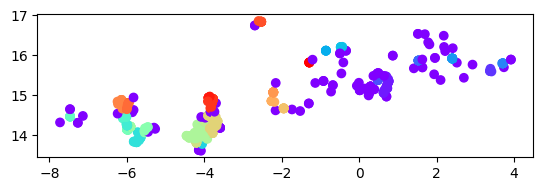

In [37]:
meid.assign(labels=clusterer.labels_).plot('labels', k=nclusters, cmap='rainbow')

In [38]:
clusterer.labels_

array([ 0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1, -1,  0,
        0, -1, -1,  0,  2,  2,  2,  2,  2,  0,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  3,  4,  4,  4,  4,  4,  4,  4,
        4, -1,  3,  3,  3,  3, -1, -1, -1, -1, -1,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7, -1, -1, -1, -1,  8,
        8,  8, -1,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 14, -1, 14, -1, -1, -1, 10, 11, 11, 12,
       12, 12, 12, 12, 11, 11, 11, 11, 13, 13, 13, 13, 13, 14, -1, 13, 13,
       13, 14, -1, 14, 14, 15, 15, 15, 15, 15, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17,
       17, 17, 17, 17, -1, 18, 18, 18, 18, 18, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16

In [39]:
meid['cluster'] = clusterer.labels_

Filter out noise (-1 label is considered noise by DBSCAN)

In [40]:
meid_clusters = meid[meid['cluster'] != -1]

In [41]:
meid_clusters.explore()

Verify time and who

In [42]:
meid_clusters.event_date.dtype

dtype('O')

In [43]:
meid_clusters.event_date = pd.to_datetime(meid_clusters.event_date)

C:\Users\micha\AppData\Local\Temp\ipykernel_20712\728975709.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  meid_clusters.event_date = pd.to_datetime(meid_clusters.event_date)
C:\Users\micha\PycharmProjects\geo_analysis\venv\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [44]:
meid_clusters

,event_id_cnty,event_date,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,civilian_targeting,...,NAME_3,NAME_4,VARNAME_4,TYPE_4,ENGTYPE_4,CC_4,sub_event_type_count,actor1_count,actor2_count,cluster
20,MLI6161,2022-01-25,Political violence,Battles,Armed clash,Military Forces of Mali (2021-),Military Forces of Estonia (2021-); Military F...,Islamic State (West Africa) - Greater Sahara F...,None,None,...,Ouatagouna,Ouattagouna,NA,Commune,Commune,NA,1,1,1,0
24,MLI30466,2023-07-06,Political violence,Battles,Armed clash,Islamic State (Sahel),None,MINUSMA: United Nations Multidimensional Integ...,None,None,...,Ouatagouna,Ouattagouna,NA,Commune,Commune,NA,1,1,1,0
26,MLI7405,2022-10-01,Political violence,Battles,Armed clash,Islamic State (Sahel),None,Military Forces of Mali (2021-),None,None,...,Ouatagouna,Ouattagouna,NA,Commune,Commune,NA,1,1,1,0
33,MLI6829,2022-06-13,Political violence,Battles,Armed clash,Islamic State (Sahel),None,Military Forces of Mali (2021-),None,None,...,Ouatagouna,Ouattagouna,NA,Commune,Commune,NA,1,1,1,0
49,MLI31600,2023-12-25,Political violence,Battles,Armed clash,Military Forces of Mali (2021-),Wagner Group,Islamic State (Sahel),None,None,...,Ouatagouna,Ouattagouna,NA,Commune,Commune,NA,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,MLI6658,2022-05-15,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,None,Military Forces of Mali (2021-),None,None,...,Gossi,Gossi,NA,Commune,Commune,NA,1,1,1,28
3950,MLI6256,2022-02-14,Political violence,Battles,Armed clash,Military Forces of France (2017-),None,JNIM: Group for Support of Islam and Muslims,None,None,...,Gossi,Gossi,NA,Commune,Commune,NA,1,1,1,28
3953,MLI30570,2023-07-21,Political violence,Battles,Armed clash,Unidentified Armed Group (Mali),None,Military Forces of Mali (2021-),None,None,...,Gossi,Gossi,NA,Commune,Commune,NA,1,1,1,28
3956,MLI6463,2022-03-27,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,None,Military Forces of France (2017-),None,None,...,Gossi,Gossi,NA,Commune,Commune,NA,1,1,1,28


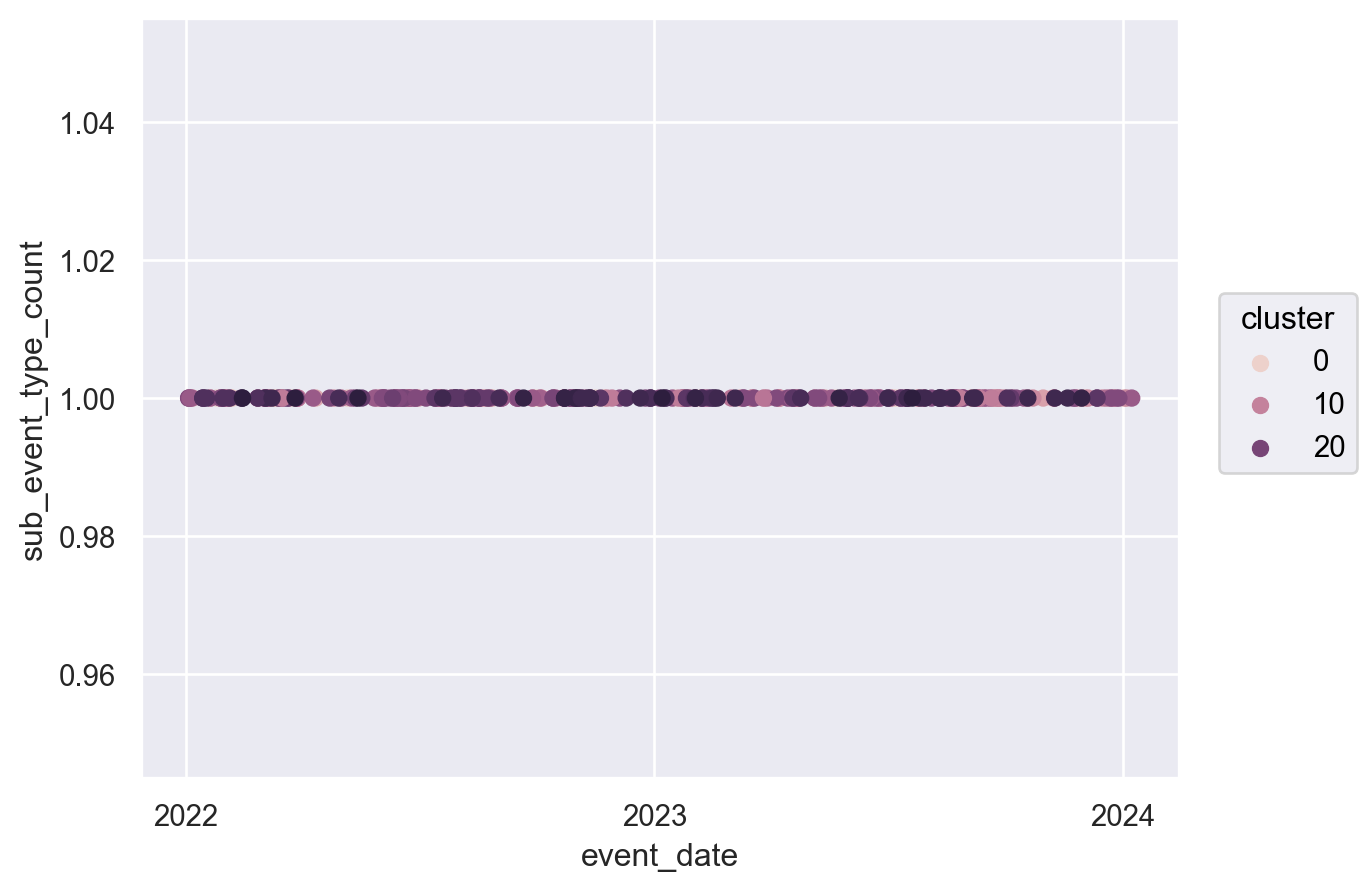

In [56]:
so.Plot(meid_clusters, x=meid_clusters.event_date, y=meid.sub_event_type_count, color=meid_clusters.cluster.name).add(so.Dot())


In [57]:
How To make a sublosts?

Object `sublosts` not found.
